In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Analysis of inter-dependance

Most general formulation: Let there be $N$ time-dependent observables, that are observed simultaneously at discrete time points. The future values of each observable depends on its own history, the history of all other observables, and also the history of other, non-observed objects. It is of interest to discover completely the equations of motion of the system, which may be exact or probabilistic. Clearly, any finite amount of data can be explained by an infinite number of equally valid equations of motion, so the exact answer to the problem depends on having a strong underlying model and is to some extend arbitrary and philosophical (e.g. to use or not to use Occam's razor). But data always comes before the model. First, exploratory model-free analysis is necessary to get intuition of which models are possible. In particular, it is useful to determine, which observables are independent, which are weakly or strongly dependent on each other. Formally this is also impossible, since even random finite data could be explained by a very complicated dependence function. Also, in order to make any progress on this problem, the laws governing the interaction of the system with any non-observed systems must be completely known a priori. For example, all observables can in general be explained solely by external input, providing zero information about the interactions within the system. Typically it is assumed that there is no external input, external input is random with a known distribution, or, if we are lucky, external input can be manipulated by the observer. In this exercise, we will start from the other end - assuming a very simple setup first, progressively relaxing assumptions.

At first, let us assume two observables, $X$ and $Y$, produce independent and identically distributed (i.i.d) samples from the joint probability distribution $\rho(x,y)$. For such observables, the question of interest is whether they are independent ($\rho(x,y) = \rho(x)\rho(y)$) or not.


### Correlation
The most common metric for testing this dependence is correlation. Defined as

$CORR(X,Y) = \frac{COV(X,Y)}{\sigma_X \sigma_Y}
= \frac{1}{\sigma_X \sigma_Y} \int_x \int_y \rho(x,y) (x-\mu_x)(y-\mu_y) dx dy$

An empirical estimator for correlation is given by

$CORR(x, y) = \frac{COV(x, y)}{s_x s_y} = \frac{1}{s_x s_y} \sum_i \frac{1}{N} (x_i-\bar{x})(y_i-\bar{y})$

It is easy to show that $CORR(X,Y) = 0$ for independent observables. This means that non-zero correlation indicates dependence of variables. The typical problems of correlation are:
* $CORR=0$ does not prove that variables are independent, only that the linear part of their possible dependence function is zero. It is frequently a misleading metric
* Estimators of correlation are typically non-zero for independent observables due to finite sample size. Weakly correlated observables require a lot of data samples for high confidence, although this is true for any metric.
* It is quite sensitive to the i.i.d assumption. Covariance is not defined for such data, and in practice the estimator can report very high spurious correlation for independent but time-dependent sequences.

### Spearmann Rank (SR)

Similar to correlation, but it can check if observables are monotonously dependent, which is a stronger test than linearity. It suffers from the same shortcomings as correlation.
* Is SR formally applicable to continous data? Is binning used in estimator? Does it depend on bin size?
* Does SR require more data for the same confidence level, given that the claim is stronger? I don't see any difference in the error curve.

### Mutual Information (MI)

Defined as $I(X;Y) = H(X) + H(Y) - H(XY)$, MI is the most general metric of dependence, as $I = 0$ if and only if the observables are truly independent. This is achieved by directly comparing the joint probability distribution to the product of marignal distributions. However, the problem is that the metric requires the joint probability distribution to be fully explored by the data to converge, which is most of the time unrealistic for experimental data. Any estimators of entropy and mutual information for continuous data require assumptions about smoothness of the underlying probability distribution to choose the bin size and discretize the problem. The result is extremely sensitive to bin size, and changes sharply every time a new bin becomes non-zero.

### Partial autocorrelation

Find out what it means
* https://en.wikipedia.org/wiki/Partial_autocorrelation_function

In [2]:
def corr(x,y):
    return np.cov(x,y)[0,1] / np.std(x) / np.std(y)

# 1) Sanity check
# Should have large correlation for functions that are constant multipliers of each other
# Should have 0 correlation for functions that are completely random
x = np.linspace(0, 1, 100)
y = x * 2.5 + np.random.normal(0, 0.1, 100)
z = np.random.normal(0, 1, 100)

print(corr(x,y))
print(corr(x,z))

print(np.corrcoef(x,y)[0,1])
print(np.corrcoef(x,z)[0,1])

print(scipy.stats.spearmanr(x,y)[0])
print(scipy.stats.spearmanr(x,z)[0])

1.0016011520746988
-0.10692210393870012
0.9915851405539519
-0.10585288289931313
0.9919831983198318
-0.13448544854485447


### Test 1: Dataset size dependence

Check the correlation and spearmann rank between two random datasets, depending on dataset size

**Conclusion:**
Correlation of completely random inputs drops roughly as $1 / (2\sqrt{N})$

Correlation fit: 0.70577052286033 *x^ -0.5230712758846461
Spearmann fit: 0.7481814148537957 *x^ -0.5294587020628372


Text(0.5,1,'Spearmann Rank')

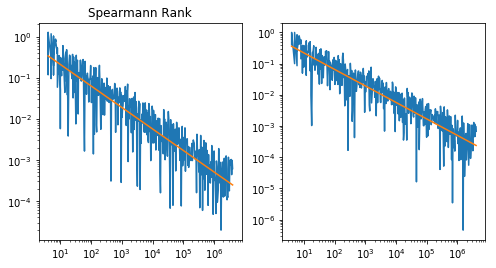

In [8]:
# 2) 
nData = np.array([int(2**(2 + i / 20)) for i in range(400)])
corrData = np.zeros(len(nData))
sprData = np.zeros(len(nData))
for i in range(len(nData)):
    x = np.random.normal(0, 1, nData[i])
    y = np.random.normal(0, 1, nData[i])
    corrData[i] = np.abs(corr(x,y))
    sprData[i] = np.abs(scipy.stats.spearmanr(x,y)[0])
    
# Fit line to log-log plot of the resulting data
corrLogFitCoeff = np.polyfit(np.log(nData), np.log(corrData), 1)
sprLogFitCoeff = np.polyfit(np.log(nData), np.log(sprData), 1)
corrZ = nData**(corrLogFitCoeff[0])*np.exp(corrLogFitCoeff[1])
sprZ = nData**(sprLogFitCoeff[0])*np.exp(sprLogFitCoeff[1])
print("Correlation fit:", np.exp(corrLogFitCoeff[1]),'*x^', corrLogFitCoeff[0])
print("Spearmann fit:", np.exp(sprLogFitCoeff[1]),'*x^', sprLogFitCoeff[0])

fig, ax = plt.subplots(ncols = 2, figsize=(8, 4))
ax[0].loglog(nData, corrData)
ax[0].loglog(nData, corrZ)
ax[0].set_title("Correlation")
ax[1].loglog(nData, sprData)
ax[1].loglog(nData, sprZ)
ax[1].set_title("Spearmann Rank")



### Test 1.1: Dataset size dependence (Markov Chains)

Correlation fit: 0.45200920975858977 *x^ -0.03456086812007497
Spearmann fit: 0.3689962553801606 *x^ -0.022721868043643016


Text(0.5,1,'Spearmann Rank')

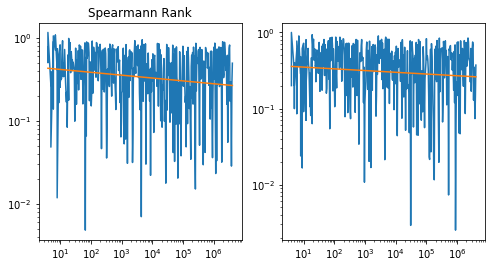

In [32]:
# 2) Test dependence of random correlation on size
nData = np.array([int(2**(2 + i / 20)) for i in range(400)])
corrData = np.zeros(len(nData))
sprData = np.zeros(len(nData))
for i in range(len(nData)):
    x = np.random.normal(0, 1, nData[i])
    y = np.random.normal(0, 1, nData[i])
    
    # Convert random data into Markov chains
    for j in range(1, nData[i]):
        x[j] += x[j-1]
        y[j] += y[j-1]
    
    corrData[i] = np.abs(corr(x,y))
    sprData[i] = np.abs(scipy.stats.spearmanr(x,y)[0])
    
# Fit line to log-log plot of the resulting data
corrLogFitCoeff = np.polyfit(np.log(nData), np.log(corrData), 1)
sprLogFitCoeff = np.polyfit(np.log(nData), np.log(sprData), 1)
corrZ = nData**(corrLogFitCoeff[0])*np.exp(corrLogFitCoeff[1])
sprZ = nData**(sprLogFitCoeff[0])*np.exp(sprLogFitCoeff[1])
print("Correlation fit:", np.exp(corrLogFitCoeff[1]),'*x^', corrLogFitCoeff[0])
print("Spearmann fit:", np.exp(sprLogFitCoeff[1]),'*x^', sprLogFitCoeff[0])

fig, ax = plt.subplots(ncols = 2, figsize=(8, 4))
ax[0].loglog(nData, corrData)
ax[0].loglog(nData, corrZ)
ax[0].set_title("Correlation")
ax[1].loglog(nData, sprData)
ax[1].loglog(nData, sprZ)
ax[0].set_title("Spearmann Rank")

### Test 1.2: Dataset size dependence (Lag Convolution)

In [14]:
def approxDelayConv(data, TAU, DT):
    if TAU == 0:
        return data
    else:    
        rez = np.zeros(len(data)+1)
        for i in range(1, len(data)+1):
            rez[i] = data[i-1] + rez[i-1] * (1 - DT / TAU)

        return rez[1:]


# 2) Test dependence of random correlation on size
DT = 1
nData = np.array([int(2**(2 + i / 20)) for i in range(400)])
Lag = np.linspace(1, 100, 4)


corrData = np.zeros((len(Lag), len(nData)))
sprData = np.zeros((len(Lag), len(nData)))


for iData in range(len(nData)):
        x = np.random.normal(0, 1, nData[iData])
        y = np.random.normal(0, 1, nData[iData])

        for iLag in range(len(Lag)):
            # Convolve data with laggy kernel
            xLag = approxDelayConv(x, Lag[iLag], DT)
            yLag = approxDelayConv(y, Lag[iLag], DT)

            corrData[iLag][iData] = np.abs(corr(xLag,yLag))
            sprData[iLag][iData] = np.abs(scipy.stats.spearmanr(xLag,yLag)[0])
            if sprData[iLag][iData] == 0:
                sprData[iLag][iData] = 1.0e-5
    
# Fit line to log-log plot of the resulting data
corrZ = np.zeros((len(Lag), len(nData)))
sprZ = np.zeros((len(Lag), len(nData)))
for iLag in range(len(Lag)):
    corrLogFitCoeff = np.polyfit(np.log(nData), np.log(corrData[iLag]), 1)
    sprLogFitCoeff = np.polyfit(np.log(nData), np.log(sprData[iLag]), 1)
    corrZ[iLag] = nData**(corrLogFitCoeff[0])*np.exp(corrLogFitCoeff[1])
    sprZ[iLag] = nData**(sprLogFitCoeff[0])*np.exp(sprLogFitCoeff[1])
    print("Lag", Lag[iLag], "Correlation fit:", np.exp(corrLogFitCoeff[1]),'*x^', corrLogFitCoeff[0])
    print("Lag", Lag[iLag], "Spearmann fit:", np.exp(sprLogFitCoeff[1]),'*x^', sprLogFitCoeff[0])

fig, ax = plt.subplots(ncols = 2, figsize=(12, 6))
ax[0].set_title("Correlation")
ax[1].set_title("Spearmann Rank")
for iLag in range(len(Lag)):
    ax[0].loglog(nData, corrData[iLag], label = "data-lag"+str(Lag[iLag]))
    ax[0].loglog(nData, corrZ[iLag], label = "fit-lag"+str(Lag[iLag]))
    ax[1].loglog(nData, sprData[iLag], label = "data-lag"+str(Lag[iLag]))
    ax[1].loglog(nData, sprZ[iLag], label = "fit-lag"+str(Lag[iLag]))
ax[0].legend()
ax[1].legend()

KeyboardInterrupt: 

[-1.62935608e-05  8.35301121e-03]


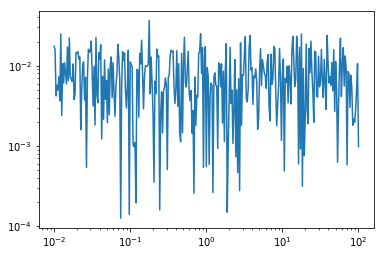

In [38]:
# 3) Test dependence on range
nData = 10**4
sigmaX = 1.0
sigmaYlst = [10**(i/80) for i in range(-160, 161)]
corrData = np.zeros(len(sigmaYlst))

for i in range(len(sigmaYlst)):
    sigmaY = sigmaYlst[i]
    x = np.random.normal(0, sigmaX, nData)
    y = np.random.normal(0, sigmaY, nData)
    corrData[i] = np.abs(corr(x,y))

print(np.polyfit(sigmaYlst, corrData, 1))
    
plt.figure()
plt.loglog(sigmaYlst, corrData)
plt.show()

# Conclusion:
# There is no observed dependence on relative scale, as expected

Let's try to do exactly what Spearmann should be good at - monotonic dependence

0.6619681590427127
1.0


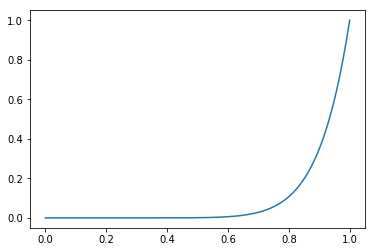

In [20]:
x = np.linspace(0, 1, 1000)
# y = 1.0 / (np.exp(-40*(x-0.5)) + 1
y = x**10

print(corr(x,y))
print(scipy.stats.spearmanr(x,y)[0])

plt.figure()
plt.plot(x,y)
plt.show()

So Spearmann Rank is strictly better than correlation coefficient for recovering dependence. How about some evil data

-2.8450202236879124e-17
0.002657046339713177


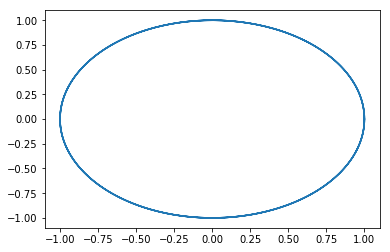

In [22]:
x = np.linspace(0, 1, 1000)
y = np.cos(6 * np.pi * x)
z = np.sin(6 * np.pi * x)

print(corr(y,z))
print(scipy.stats.spearmanr(y,z)[0])

plt.figure()
plt.plot(y,z)
plt.show()

# Not a chance :D

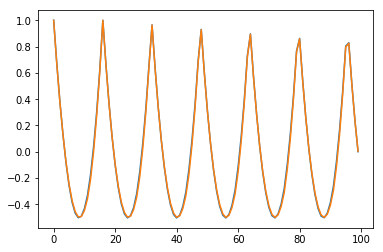

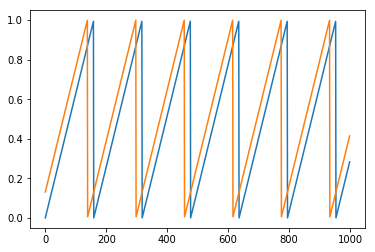

In [31]:
# How about some cyclic time-shifting
x = np.linspace(0, 1, 1000)
y = 2 * np.pi * x % 1
corrList1 = []
corrList2 = []

for i in range(100):
    phi = 2 * np.pi * i / 100
    z = (2 * np.pi * x + phi) % 1
    corrList1.append(corr(y,z))
    corrList2.append(scipy.stats.spearmanr(y,z)[0])

plt.figure()
plt.plot(corrList1)
plt.plot(corrList2)
plt.show()

plt.figure()
plt.plot(y)
plt.plot((2 * np.pi * x + 2 * np.pi * 18 / 100) % 1)
plt.show()



Cool, so time-shifting of smooth time-delayed functions monotonically increases towards correct delay reversal. Lets try a stochastic time-delayed function instead.

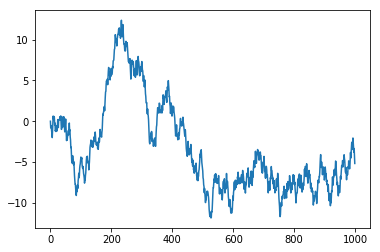

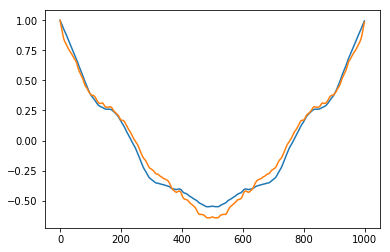

In [37]:
# Create a markov chain
x = np.linspace(0, 1, 1000)
y1 = np.random.uniform(-1, 1, 1000)
y2 = np.zeros(1000)
for i in range(1, 1000):
    y2[i] = y2[i-1] + y1[i-1]
    
plt.figure()
plt.plot(y2)
plt.show()

corrList1 = []
corrList2 = []

for i in range(1000):
    z = np.array([y2[(j + i) % 1000] for j in range(1000)])
    corrList1.append(corr(y2,z))
    corrList2.append(scipy.stats.spearmanr(y2,z)[0])

plt.figure()
plt.plot(corrList1)
plt.plot(corrList2)
plt.show()

Result: Lol, it even works linearly with chains. What about purely random data?
    

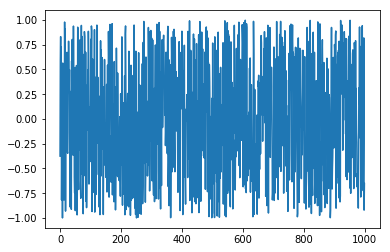

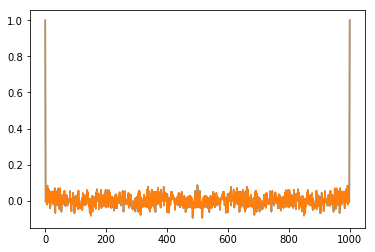

In [39]:
# Create a markov chain
x = np.linspace(0, 1, 1000)
y = np.random.uniform(-1, 1, 1000)
    
plt.figure()
plt.plot(y)
plt.show()

corrList1 = []
corrList2 = []

for i in range(1001):
    z = np.array([y[(j + i) % 1000] for j in range(1000)])
    corrList1.append(corr(y,z))
    corrList2.append(scipy.stats.spearmanr(y,z)[0])

plt.figure()
plt.plot(corrList1)
plt.plot(corrList2)
plt.show()

Conclusion: If any amount of smoothness can be assumed about dependent functions, then the maximum correlation should increase gradually towards a global maximum, although some local maxima will also be present. However, with wildly varying functions there is no indication of improvement unless exactly the correct delay is hit